In [36]:
# импортируем нужные для чтения и анализа библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

# прочитаем файл
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок
stud = pd.read_csv('stud_math.csv')

# приведем наименование некоторых столбцов к более удобному виду
stud = stud.rename(columns={'Pstatus': 'pstatus','Medu': 'medu', 'Fedu': 'fedu', 'Mjob': 'mjob',
                             'Fjob': 'fjob'})
#удалим лишнюю строку
stud.drop('studytime, granular', axis=1, inplace=True)

#обработаем столбец addres, заменим пустые значения
stud.address = stud.address.astype(str).apply(lambda x: None if (x.strip() == '' or x == 'nan') else x)

#обработаем столбец famsiz, заменим пустые значения
stud.famsize = stud.famsize.astype(str).apply(lambda x: None if (x.strip() == '' or x == 'nan') else x)

#обработаем столбец pstatus, заменим пустые значения 
stud.pstatus = stud.pstatus.astype(str).apply(lambda x: None if (x.strip() == '' or x == 'nan') else x)

#преобразуем столбец medu
stud.medu = stud.medu.apply(lambda x: float(x))

#обработаем столбец fedu, удалим выброс
stud = stud.loc[stud.fedu != 40.0]

#обработаем столбец mjob, заменим пустые значения
stud.mjob = stud.mjob.astype(str).apply(lambda x: None if (x.strip() == '' or x == 'nan') else x)

#обработаем столбец fjob, заменим пустые значения
stud.fjob = stud.fjob.astype(str).apply(lambda x: None if (x.strip() == '' or x == 'nan') else x)

#обработаем столбец reason, заменим пустые значения
stud.reason = stud.reason.astype(str).apply(lambda x: None if (x.strip() == '' or x == 'nan') else x)

#обработаем столбец guardian, заменим пустые значения
stud.guardian = stud.guardian.astype(str).apply(lambda x: None if (x.strip() == '' or x == 'nan') else x)

#преобразуем столбец failures, 
stud.failures = stud.failures.apply(lambda x: float(x))

#обработаем столбец schoolsup, заменим пустые значения
stud.schoolsup = stud.schoolsup.astype(str).apply(lambda x: None if (x.strip() == '' or x == 'nan') else x)

#обработаем столбец famsup, заменим пустые значения
stud.famsup = stud.famsup.astype(str).apply(lambda x: None if (x.strip() == '' or x == 'nan') else x)

#обработаем столбец paid, заменим пустые значения
stud.paid = stud.paid.astype(str).apply(lambda x: None if (x.strip() == '' or x == 'nan') else x)

#обработаем столбец activities, заменим пустые значения
stud.activities = stud.activities.astype(str).apply(lambda x: None if (x.strip() == '' or x == 'nan') else x)

#обработаем столбец nursery, заменим пустые значения
stud.nursery = stud.nursery.astype(str).apply(lambda x: None if (x.strip() == '' or x == 'nan') else x)

#обработаем столбец higher, заменим пустые значения
stud.higher = stud.higher.astype(str).apply(lambda x: None if (x.strip() == '' or x == 'nan') else x)

#обработаем столбец internet, заменим пустые значения
stud.internet = stud.internet.astype(str).apply(lambda x: None if (x.strip() == '' or x == 'nan') else x)

#обработаем столбец romantic, заменим пустые значения
stud.romantic = stud.romantic.astype(str).apply(lambda x: None if (x.strip() == '' or x == 'nan') else x)

#обработаем столбец famrel, удалим выброс
stud = stud.loc[stud.famrel !=-1.0]

#преобразуем столбец health
stud.health = stud.health.apply(lambda x: float(x))

#обработаем столбец absences, удалим выброс
IQR_a = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25_a = stud.absences.quantile(0.25)
perc75_a = stud.absences.quantile(0.75)
stud = stud.loc[stud.absences.between(perc25_a - 1.5*IQR_a, perc75_a + 1.5*IQR_a)]


#обработаем столбец score
stud = stud.dropna(subset=['score'], axis = 0)


In [37]:
#Корреляционный анализ
stud.corr()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.168805,-0.166681,0.081581,0.002755,0.183245,0.054576,0.036956,0.123274,-0.061618,0.158915,-0.159303
medu,-0.168805,1.000000,0.630589,-0.188411,0.088130,-0.239078,-0.016936,0.036623,0.054977,-0.052923,0.070282,0.210282
fedu,-0.166681,0.630589,1.000000,-0.144825,0.003167,-0.283302,-0.030494,-0.009167,0.043267,0.019584,-0.021412,0.111636
traveltime,0.081581,-0.188411,-0.144825,1.000000,-0.108298,0.073569,-0.053151,-0.005921,0.027669,0.001530,-0.046846,-0.077995
studytime,0.002755,0.088130,0.003167,-0.108298,1.000000,-0.169041,0.014993,-0.141286,-0.037274,-0.087502,-0.069229,0.110724
failures,0.183245,-0.239078,-0.283302,0.073569,-0.169041,1.000000,0.023885,0.097370,0.086849,0.093352,0.064583,-0.328495
famrel,0.054576,-0.016936,-0.030494,-0.053151,0.014993,0.023885,1.000000,0.169973,0.082824,0.094629,-0.075659,0.056259
freetime,0.036956,0.036623,-0.009167,-0.005921,-0.141286,0.097370,0.169973,1.000000,0.281734,0.045982,0.103852,0.034553
goout,0.123274,0.054977,0.043267,0.027669,-0.037274,0.086849,0.082824,0.281734,1.000000,0.009364,0.118877,-0.123170
health,-0.061618,-0.052923,0.019584,0.001530,-0.087502,0.093352,0.094629,0.045982,0.009364,1.000000,-0.018787,-0.056029


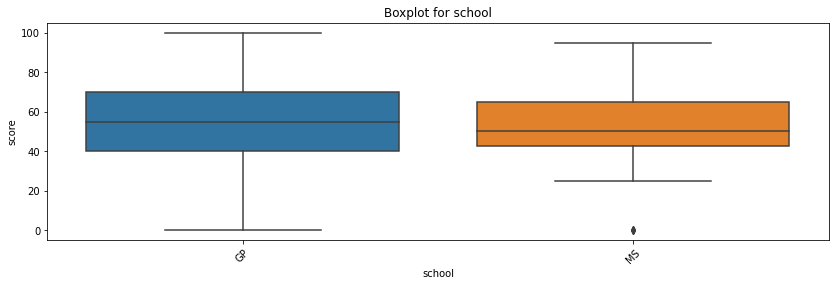

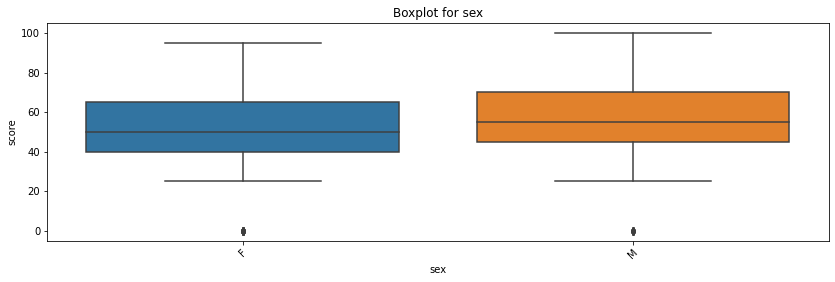

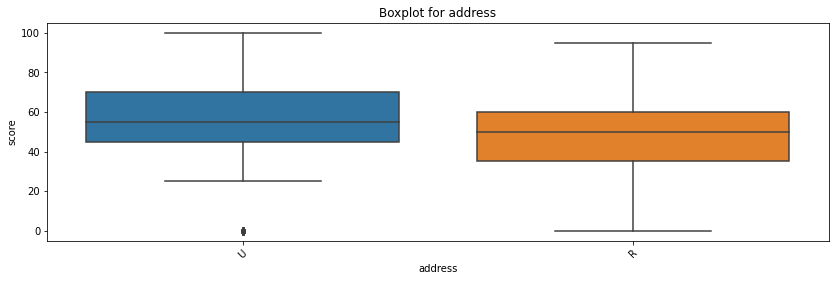

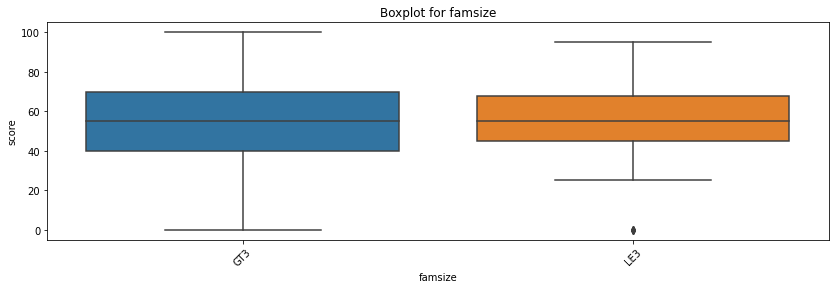

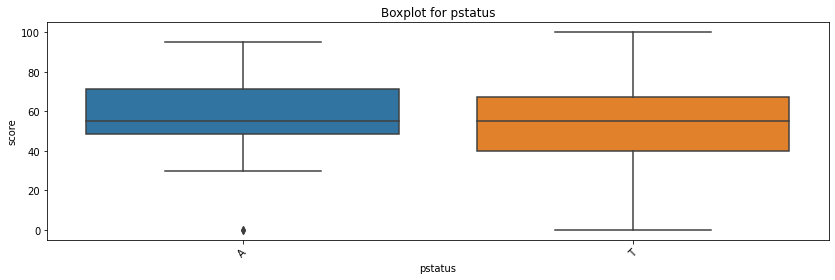

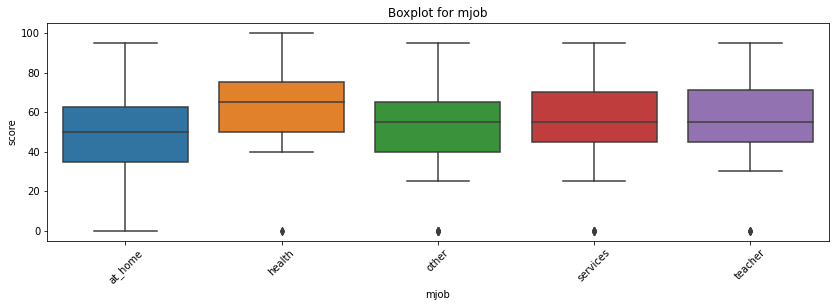

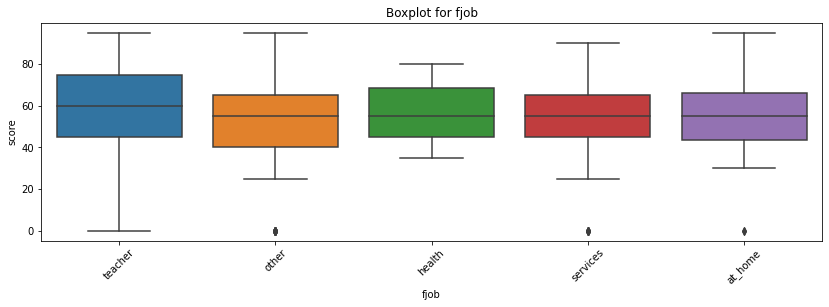

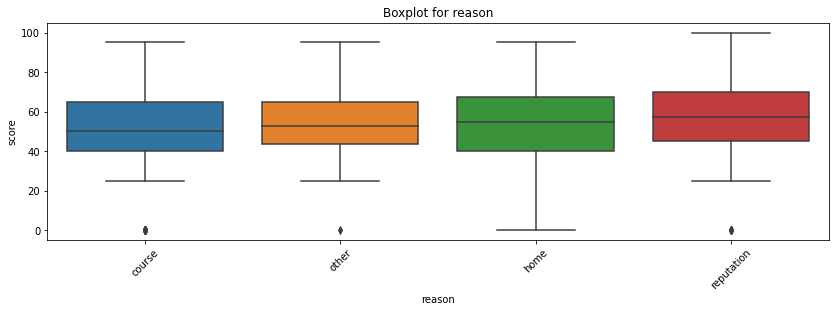

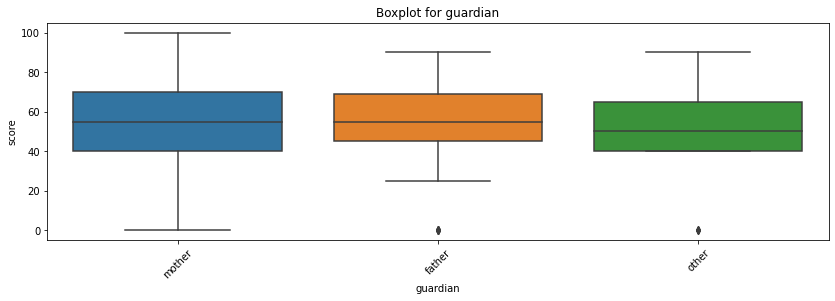

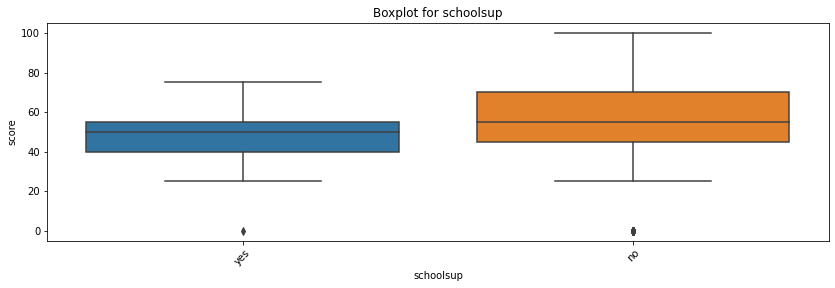

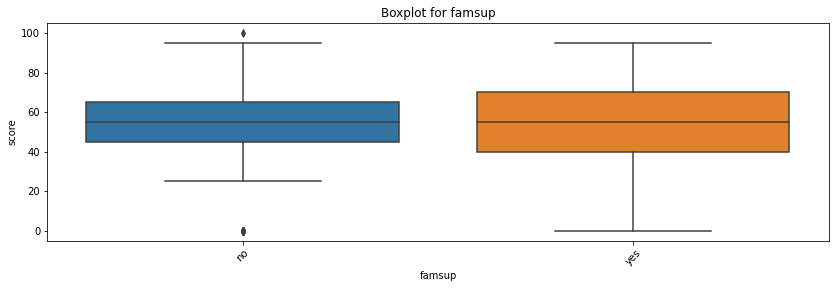

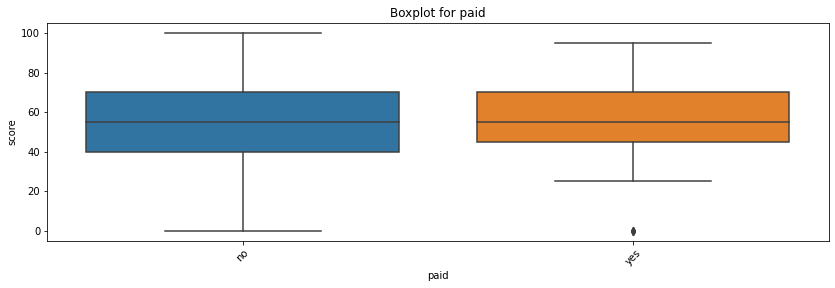

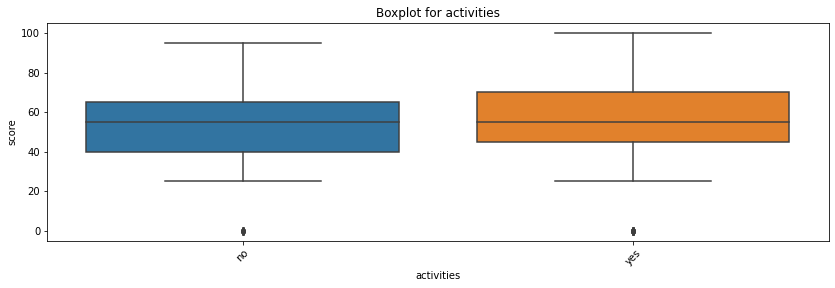

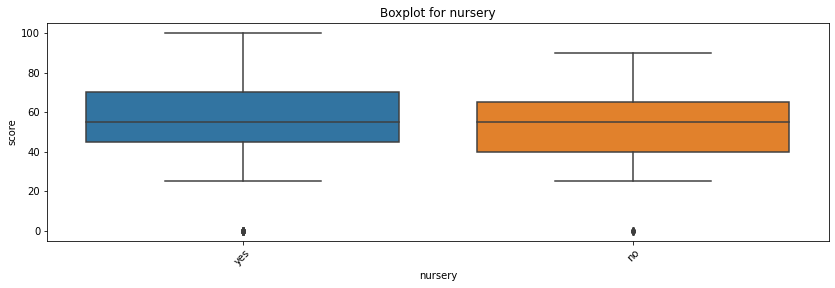

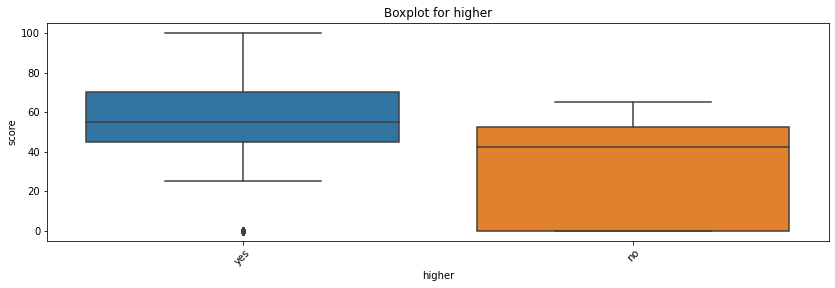

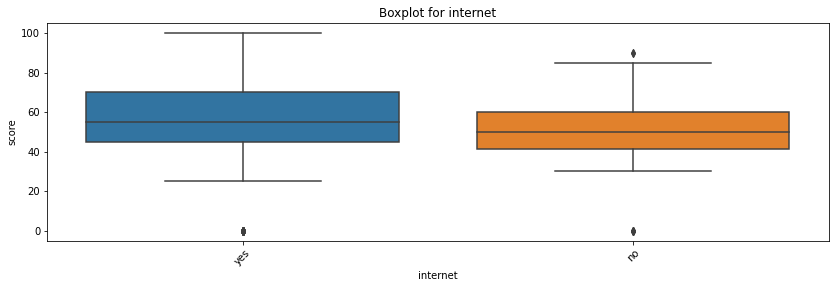

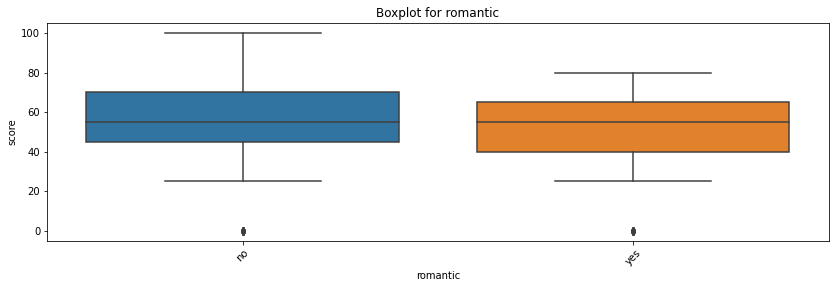

In [38]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score',  
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 
            'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [39]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 
            'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [19]:
stud_for_model = stud.loc[:, ['sex', 'address', 'mjob', 'paid', 'higher', 'romantic']]
stud_for_model .head()

,sex,address,mjob,paid,higher,romantic
0,F,U,at_home,no,yes,no
1,F,U,at_home,no,yes,no
2,F,U,at_home,None,yes,None
3,F,U,health,yes,yes,yes
4,F,U,other,yes,yes,no


In [40]:
#В результате EDA для анализа влияния различных параметров шоколада на баллы по госэкзамену по математике
#были получены следующие выводы:

#В данных достаточно мало пустых значений,
#столбцы pstatus, fjob, famsup, paid содержат больше пропусков чем остальные.

#Выбросы найдены в
#столбцах fedu, famrel,absences  что позволяет сделать вывод о том, что данные достаточно чистые.

#Незначительная отрицательная корреляция параметра failures и score
#может говорить о том, что с количеством внеучебных неудач, на баллы по госэкзамену по математике снижаются.

#Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели
#это sex, address, mjob, paid, higher и romantic
